<a href="https://colab.research.google.com/github/ryanjmy90/DA_Portfolio/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌DATA SCHOOL PROJECT06**  
**┗ 고객 Segmentation을 위한 RFM분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 고객 Segmentation을 위한 RFM분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 Segmentaion
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ Segmentation 기법인 RFM 개념을 이해하고, 적용할 수 있는 역량 습득
```

## **문제상황 Introduction**
---

> **시나리오**  🌟⛳

```
A사는 오픈마켓 플랫폼을 운영 중이다. 런칭 이후 사용자들이 빠르게 상승하였지만, 현재는 정체기에 빠져있다. 현재 서비스 이용 수준이  
어떻게 되고 있으며 런칭 이후 어떻게 변해왔는지를 파악하기 위해 다양한 분석을 수행하고자 한다.

```  

> **문제정의**

```
▶ 런칭 이후 서비스 정체기로 인한 영업이익, 사용 고객수 감소
```  

> **기대효과**

```
▶ 정체 원인 파악 및 대응책 수립 및 실행을 통한 영업이익, 사용 고객수 증가
```

> **해결방안**

```
▶ 구매 데이터 활용 서비스 이용 현황 파악(지표 기획)
```

> **성과측정**  

```
▶ 지표 활용 서비스 사용 현황 파악
```

> **운영**  

```
▶ 지표 활용 데이터 인사이트 리포트 발행
▶ 개발된 지표 활용 대시보드(*BI tool 활용) 개발 후 모니터링 및 이슈 확인
```

> **데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세 ⬇

|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|송장번호|재고코드|상세설명|수량|송장날짜|개당가격|고객ID|나라|




In [ ]:
#RFM stands for
#Recency, Frequency, Monetary

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/zerobase/project6')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/zerobase/project6'

In [ ]:
# ▶ pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df=pd.read_csv('S_PJT06_DATA.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔈Process01**  
**┗ 서비스 이용형태 탐색**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# ▶ Data 형태 확인
# ▶ 541,909 row, 8 col로 구성됨
print('df', df.shape)

df (541909, 8)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# ▶ Outlier 확인,  Quantity에 Negative, UnitPrice에 Negative있음 확인필요
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.duplicated().sum()

5268

In [ ]:
# ▶ null value drop
# ▶ CustomerID 기준으로 Null value drop
df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: xlabel='Quantity', ylabel='Density'>

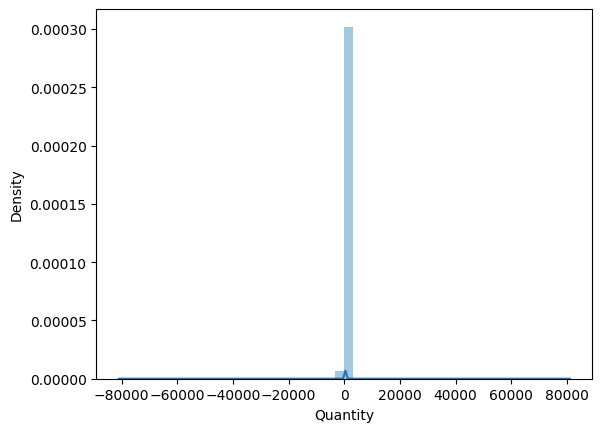

In [ ]:
# ▶ distplot 활용 음수 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['default'])
sns.distplot(df['Quantity'])

In [ ]:
#unit price 음수값제거
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# ▶ Quantity 음수값 제거
df = df[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
#중복값 체크
df.duplicated().sum()

5192

In [ ]:
# 541909, 392692

df.drop_duplicates(inplace=True)
df.shape

(392692, 8)

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# ▶ 이용 고객수(4,338명), 이용품목건수(5,152,0002건), 이용 나라(37개국),
df['CustomerID'].nunique(), df['Quantity'].sum(), df['Country'].nunique()

(4338, 5152002, 37)

In [ ]:
#인당 평균 구매 건수
ans = df.groupby('CustomerID')['InvoiceNo'].count().mean()
ans

90.52374366067312

## **🔉Process02**  

### · Cohort Analysis

In [ ]:
import pandas as pd

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#월별 데이터를 이용하여 Cohort Analysis 진행할 예쩡
#최근 구매일 - 최초 구매일을 이용한 첫 구매후 얼마 후에 구매인지를 계산 할 수 있음
#Transform('min')을 활용하여 Customer ID 별 첫 구매일 구할 수 있음

df['InvoiceDateFirst'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df[['CustomerID', 'InvoiceDate', 'InvoiceDateFirst']].sample(5)

,CustomerID,InvoiceDate,InvoiceDateFirst
393183,13115.0,2011-10-12 12:42:00,2011-06-08 16:15:00
427340,17655.0,2011-10-30 14:15:00,2010-12-08 16:45:00
511145,13521.0,2011-11-29 15:09:00,2011-11-29 15:09:00
384737,16558.0,2011-10-07 14:23:00,2010-12-08 12:01:00
254456,12647.0,2011-07-07 13:54:00,2010-12-05 14:02:00


In [ ]:
#연도별 차이, 월별 차이 구할 수 있음

year_diff = df['InvoiceDate'].dt.year - df['InvoiceDateFirst'].dt.year

month_diff = df['InvoiceDate'].dt.month - df['InvoiceDateFirst'].dt.month


In [ ]:
year_diff.value_counts()

0    251153
1    141539
Name: count, dtype: int64

In [ ]:
month_diff.value_counts().head()

 0    124030
-1     21677
 2     18038
 1     17405
 3     15872
Name: count, dtype: int64

In [ ]:
#Cohort 매월 별 판매수 변화를 볼 수 있음
df['CohortIndex'] = year_diff * 12 + month_diff + 1
df['CohortIndex'].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

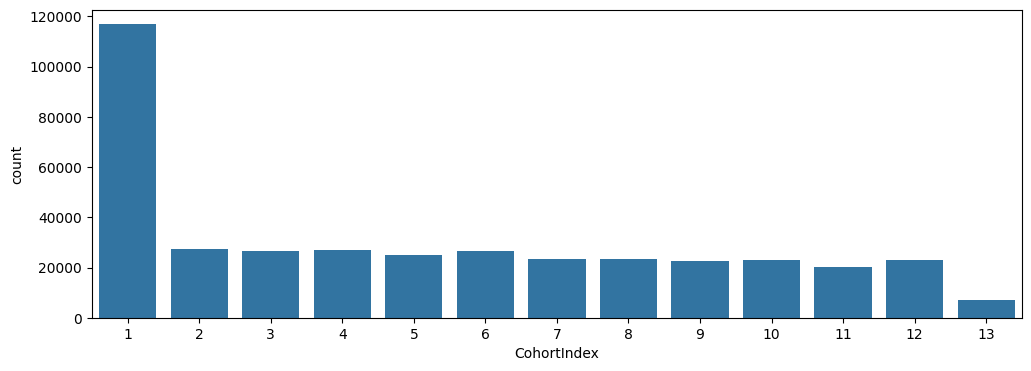

In [ ]:
#시각화 - 첫번째 달에서 2번째 달로 갈 때 급격하게 줄어듬

plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'CohortIndex')
plt.show()

In [ ]:
df['InvoiceDateFirstYM'] = df['InvoiceDateFirst'].astype('str').str[:7]
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12


In [ ]:
#언제 구매했는지 첫달 구하고, 첫 번째 달에 구매한 구매자 수, 그다음달 구매자수
cohort_count = df.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['CustomerID'].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

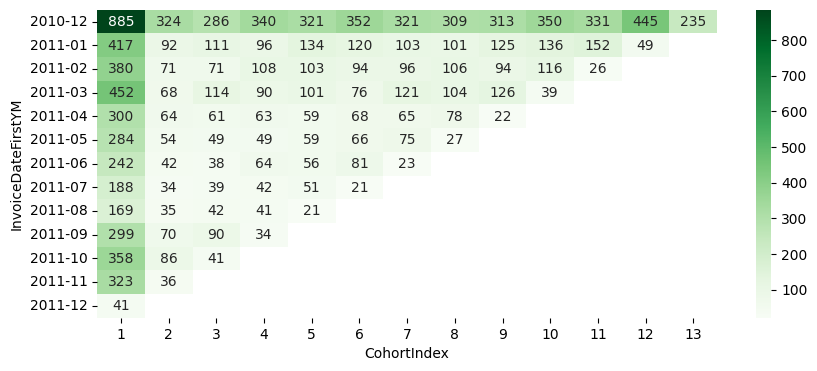

In [ ]:
#heatmap 이용하여 시각화, 남아 있는 고객의 수를 시각화를 해서 나타냄
plt.figure(figsize=(10,4))
sns.heatmap(cohort_count, annot=True, fmt='.0f', cmap='Greens')
plt.show()

In [ ]:
#월별 신규 유입 고객수
cohort_count[1].head()

InvoiceDateFirstYM
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
Name: 1, dtype: float64

<Axes: xlabel='InvoiceDateFirstYM'>

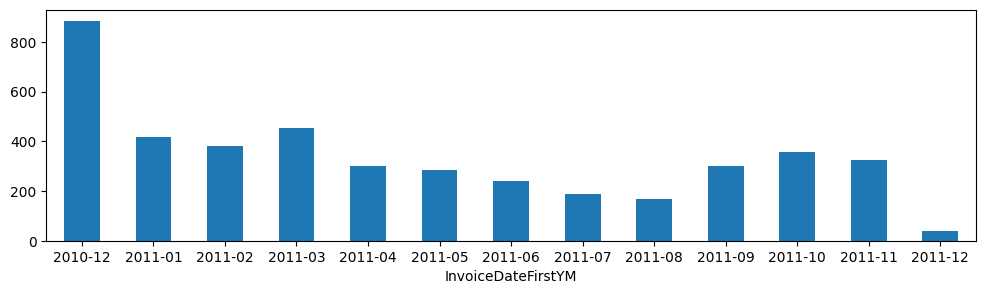

In [ ]:
cohort_count[1].plot(kind='bar', figsize = (12,3), rot = 0)

In [ ]:
cohort_norm = cohort_count.div(cohort_count[1], axis =0)

<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

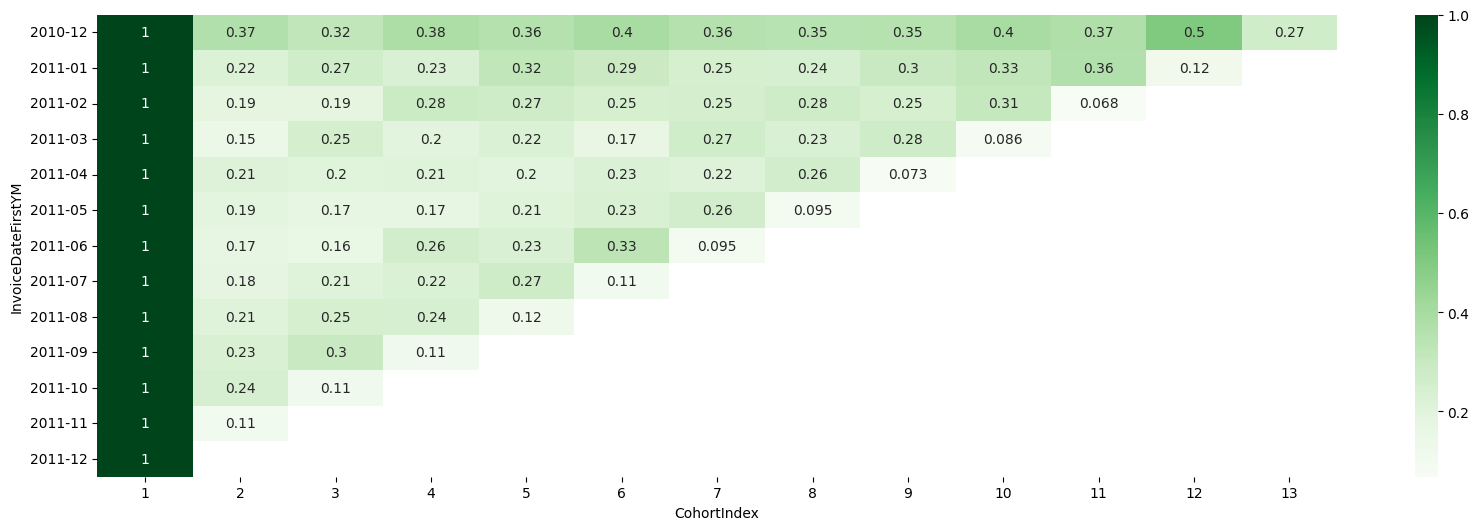

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(cohort_norm, annot=True, cmap='Greens')

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,20.34


In [ ]:
#고객별 Cohort Index에 따른 매출액
cohort_total_price = df.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['TotalPrice'].sum().unstack()

<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

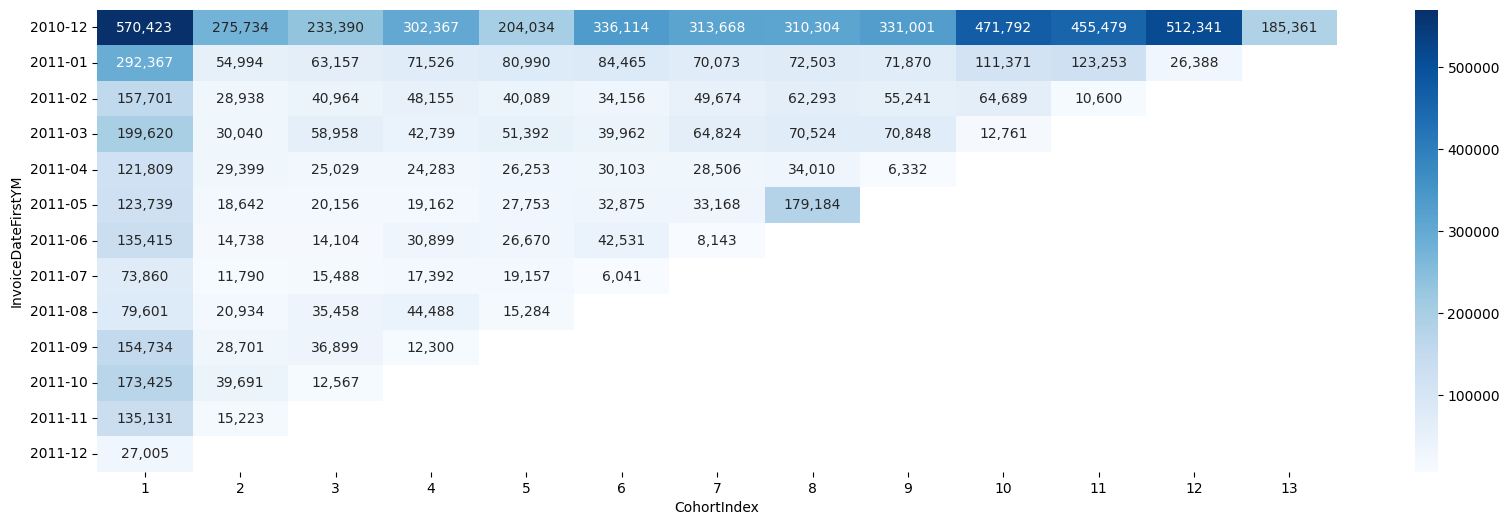

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(cohort_total_price, annot=True, fmt=',.0f', cmap='Blues')

Conclusion - Retention Analysis
- 전제 적인 고객들의 구매율이 떨어 저 가고있으며 2010년 12월에 들어온 고객들은 충성 고객이 된듯 함 1년이 지나도 비슷한 매출을 나타내고 있는 것을 볼 수 있음
- 27% 고객이 남아있지만 매출액은 처음과 비슷하게 남아있으며 남아 있는 50%로가 상당한 매출을 만들어 주고 있음, 충성 고객
-2011년 5월에 가입한 고객들의 8번째 달의 매출은 따로 분석을 해 볼 필요성이 있음

## **🔉Process03**  
**┗ 지표 기획 및 데이터 추출**  
---



### · Recency(최근성)
---

In [ ]:
# ▶ split 사용해서 송장 데이터에 날짜 데이터만 추출하기
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,2010-12,20.34


In [ ]:
df['TotalPrice'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

In [ ]:
#이상치 발견, total price가 160K인건 삭제 하도록 하겠음

df[df['TotalPrice'] > 100000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,TotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011-05-18 09:52:00,8,2011-05,168469.6


In [ ]:
#3번째 이상치라고 판단, 지우겠음
df[df['CustomerID'] == 16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,TotalPrice
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,2011-05-18 09:52:00,1,2011-05,1.65
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,2011-05-18 09:52:00,1,2011-05,1.25
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011-05-18 09:52:00,8,2011-05,168469.60


In [ ]:
df = df[df['TotalPrice'] < 100000].copy()
df['TotalPrice'].describe()

count    392691.000000
mean         22.202544
std         156.608909
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max       77183.600000
Name: TotalPrice, dtype: float64

In [ ]:
df['InvoiceDate'].head(1)

0   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
#가장 최근에 구매가 일어난 날짜 구하기, 마지막 날짜를 1로 하기 위해서 timedelta를 이용하여 1을 더해줌
import datetime as dt

last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

In [ ]:
# ▶ 고객의 가장 마지막 구매일로 부터 몇일이 지났는지를 계산하기 위함
recency = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (last_timestamp - x.max()).days})
recency.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


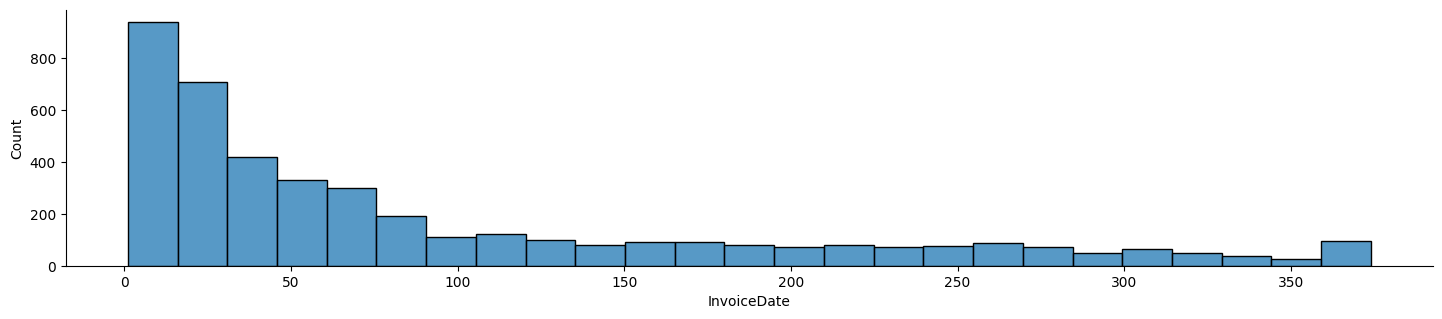

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['default'])

sns.displot(data = recency, x="InvoiceDate");
plt.gcf().set_size_inches(16.5, 3)

### · Frequency(최빈성)
---

In [ ]:
frequency = df.groupby('CustomerID').agg({'InvoiceDate' : 'count'})
frequency.head()

,InvoiceDate
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


### · Monetary(금액)
---

In [ ]:
# ▶ 구매금액 = 구매개수 * 구매단가
monetary = df.groupby('CustomerID').agg({'TotalPrice' : 'sum'})
monetary.head()

,TotalPrice
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [ ]:
#merge
import pandas as pd

rf = pd.merge(recency, frequency, on='CustomerID', how='left')

rfm = pd.merge(rf, monetary, on='CustomerID', how='left' )

rfm.head()

,InvoiceDate_x,InvoiceDate_y,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm = rfm.rename(columns={'InvoiceDate_x' : 'recency', 'InvoiceDate_y' : 'frequency', 'TotalPrice' : 'monetary' })

In [ ]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm.describe()

,recency,frequency,monetary
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


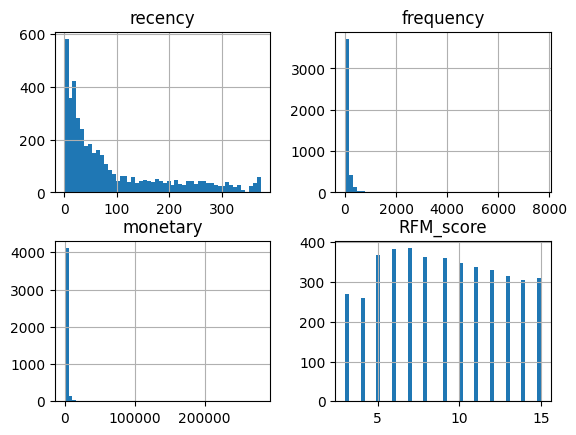

In [ ]:
rfm.hist(bins=50);

## **🔊Process04**  
**┗ RFM 활용 서비스 이용 수준 측정**  
---



### · Scailing Data
---

In [ ]:
# Recency는 최근일수록 점수가 높게
# Frequency랑 Monetary는 값이 클수록 높은 스코어

r_labels = list(range(5, 0, -1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))
cut_size = 5

In [ ]:
pd.qcut?

In [ ]:
#qcut 동일한 숫자로 그룹일 동일 하게 놔누는 방법, cut은 점수별이고 qcut은 숫자별 for example ) 상대평가
r_qcut = pd.qcut(x=rfm['recency'], q=cut_size, labels=r_labels)
r_qcut.value_counts(1)

recency
4    0.204703
5    0.203550
1    0.199631
3    0.197787
2    0.194329
Name: proportion, dtype: float64

In [ ]:
f_qcut = pd.qcut(x=rfm['frequency'], q=cut_size, labels=f_labels)
f_qcut.value_counts(1)

frequency
1    0.213693
4    0.199401
5    0.198709
3    0.195251
2    0.192946
Name: proportion, dtype: float64

In [ ]:
m_qcut = pd.qcut(x=rfm['monetary'], q=cut_size, labels=m_labels)
m_qcut.value_counts(1)

monetary
1    0.200092
3    0.200092
5    0.200092
2    0.199862
4    0.199862
Name: proportion, dtype: float64

In [ ]:
rfm = rfm.assign(R=r_qcut.values, F=f_qcut.values, M=m_qcut.values)
rfm.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [ ]:
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [ ]:
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [ ]:
rfm['RFM_score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5


### · Grade(점수) 구간화
---



In [ ]:
#RFM이 높으면 높을 수록 recency가 낮음, 산지 얼마 안됬음
rfm.groupby('RFM_score').agg({'recency' : 'mean', 'frequency' : 'mean', 'monetary' : ['mean','sum']}).style.background_gradient().format('{:,.0f}')

In [ ]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=3, labels=['silver','gold','platinum'])
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver


In [ ]:
rfm.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1668.0,5.209832,1.384324,3.0,4.0,5.0,6.0,7.0
gold,1409.0,9.469127,1.114505,8.0,8.0,9.0,10.0,11.0
platinum,1261.0,13.471055,1.124120,12.0,12.0,13.0,14.0,15.0


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

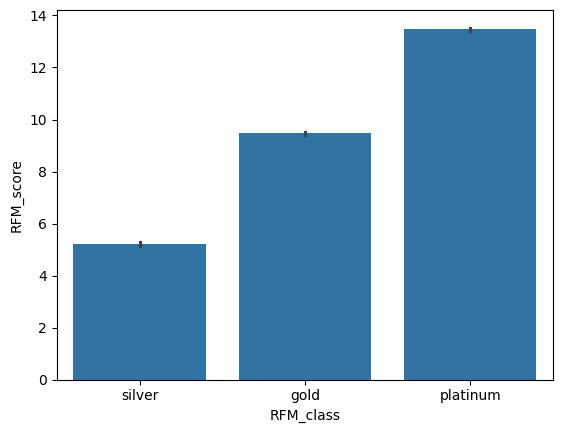

In [ ]:
sns.barplot(data=rfm, x='RFM_class', y='RFM_score')

In [ ]:
rfm.groupby('RFM_class').agg({'recency' : 'mean', 'frequency' : 'mean', 'monetary' : ['mean', 'sum', 'count'] })

recency   frequency     monetary                   
                 mean        mean         mean          sum count
RFM_class                                                        
silver     170.072542   17.068945   411.232339   685935.542  1668
gold        65.855926   55.664301  1005.104153  1416191.752  1409
platinum    19.949247  226.636796  5247.114988  6616612.000  1261

In [ ]:
rfm.groupby('RFM_class').agg({'recency' : 'mean', 'frequency' : 'mean', 'monetary' : ['mean', 'sum', 'count'] }).style.background_gradient().format('{:,.0f}')

In [ ]:
#correlation 찾아보기

corr = rfm.select_dtypes(include=['number']).corr()
corr

,recency,frequency,monetary,RFM_score
recency,1.000000,-0.206618,-0.122937,-0.700621
frequency,-0.206618,1.000000,0.444920,0.404260
monetary,-0.122937,0.444920,1.000000,0.250433
RFM_score,-0.700621,0.404260,0.250433,1.000000


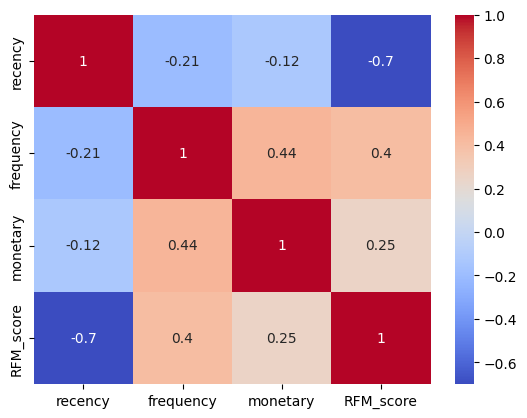

In [ ]:
sns.heatmap(data=corr, annot=True, cmap='coolwarm');

Conclusion

Silver Class - 평균 구매일 170일 지났으며, 17번 구매 411 구매
Gold Class - 평균 구매일 66일 지났으며, 56번 구매 1,005 구매
Platinum Class평균 구매일 20일 지났으며, 227번 구매 5,247 구매